In [144]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [145]:
#Import the movies datasets
df_movies = pd.read_csv('movies.dat',sep='::',names=['MovieID','Title','Genres'])
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [146]:
#Import the Users datasets
df_Users = pd.read_csv('Users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip-code'])
df_Users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [147]:
#Import the ratings datasets
df_ratings = pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'])
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [148]:
# merge the three dataset with only MovieID, Title, UserID, Age, Gender, Occupation, and Rating columns
Master_Data =  df_ratings.merge(df_Users,on='UserID')
Master_Data.head(6)

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067
5,1,1197,3,978302268,F,1,10,48067


In [149]:
Master_Data = Master_Data.merge(df_movies,on='MovieID')
Master_Data                        

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [150]:
# drop unwanted columns
Master_Data.drop(columns=['Timestamp','Zip-code'], inplace=True)
Master_Data

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Genres
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,M,18,17,Modulations (1998),Documentary
1000205,5675,2703,3,M,35,14,Broken Vessels (1998),Drama
1000206,5780,2845,1,M,18,17,White Boys (1999),Drama
1000207,5851,3607,5,F,18,20,One Little Indian (1973),Comedy|Drama|Western


## 1. Data exploration and preprocessing

In [151]:
Master_Data.shape

(1000209, 8)

In [152]:
Master_Data.isna().sum()

UserID        0
MovieID       0
Rating        0
Gender        0
Age           0
Occupation    0
Title         0
Genres        0
dtype: int64

In [153]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Gender      1000209 non-null  object
 4   Age         1000209 non-null  int64 
 5   Occupation  1000209 non-null  int64 
 6   Title       1000209 non-null  object
 7   Genres      1000209 non-null  object
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [154]:
Master_Data.describe()

,UserID,MovieID,Rating,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,2.973831e+01,8.036138e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,2.500000e+01,2.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,2.500000e+01,7.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,5.600000e+01,2.000000e+01


## 2. Data Analysis and Visualization

In [155]:
Master_Data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

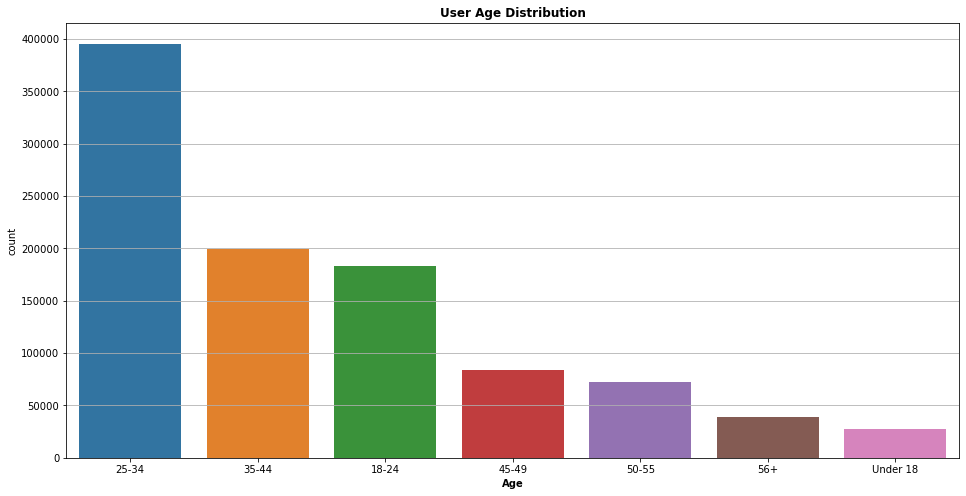

In [156]:
# User Age Distribution
plt.figure(figsize=(16,8))
sns.countplot(x='Age', data=Master_Data , order= Master_Data['Age'].value_counts().index) 
txt = {'weight':'bold'}
plt.title('User Age Distribution', fontdict=txt)
plt.xlabel('Age', fontdict=txt) 
plt.grid(axis='y')
positions = (0,1, 2, 3, 4, 5, 6)
labels = ("25-34", "35-44", "18-24","45-49","50-55","56+", "Under 18")
plt.xticks(positions, labels)
plt.show()

The majority of users a between 25-34 years old, while the least number of users are under 18 years old.

In [157]:
# create new dataframe with only Toy Story info
df_groupPy_Title = Master_Data.groupby(['Title']) 
Toy_Story = df_groupPy_Title.get_group('Toy Story (1995)')

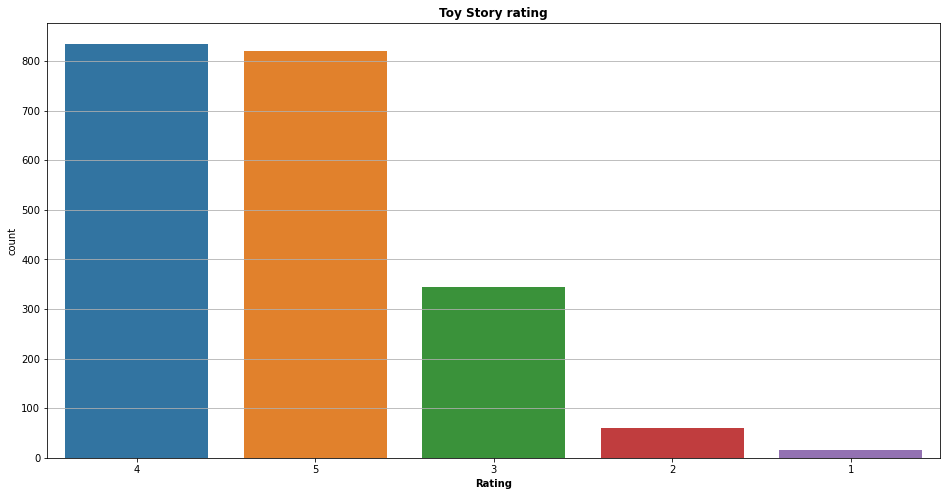

In [158]:
# User rating of the movie “Toy Story”
plt.figure(figsize=(16,8))
sns.countplot(x='Rating', data=Toy_Story , order= Toy_Story['Rating'].value_counts().index) 
txt = {'weight':'bold'}
plt.title('Toy Story rating', fontdict=txt)
plt.xlabel('Rating', fontdict=txt) 
plt.grid(axis='y')  
plt.show()

The “Toy Story” movie has a high rating of 4 and 5.

In [159]:
# Top 25 movies by viewership rating
Master_Data['Rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

In [160]:
# group by Rating
df_groupPy_Rating = Master_Data.groupby(['Rating']) 
top_movies = df_groupPy_Rating.get_group(5)

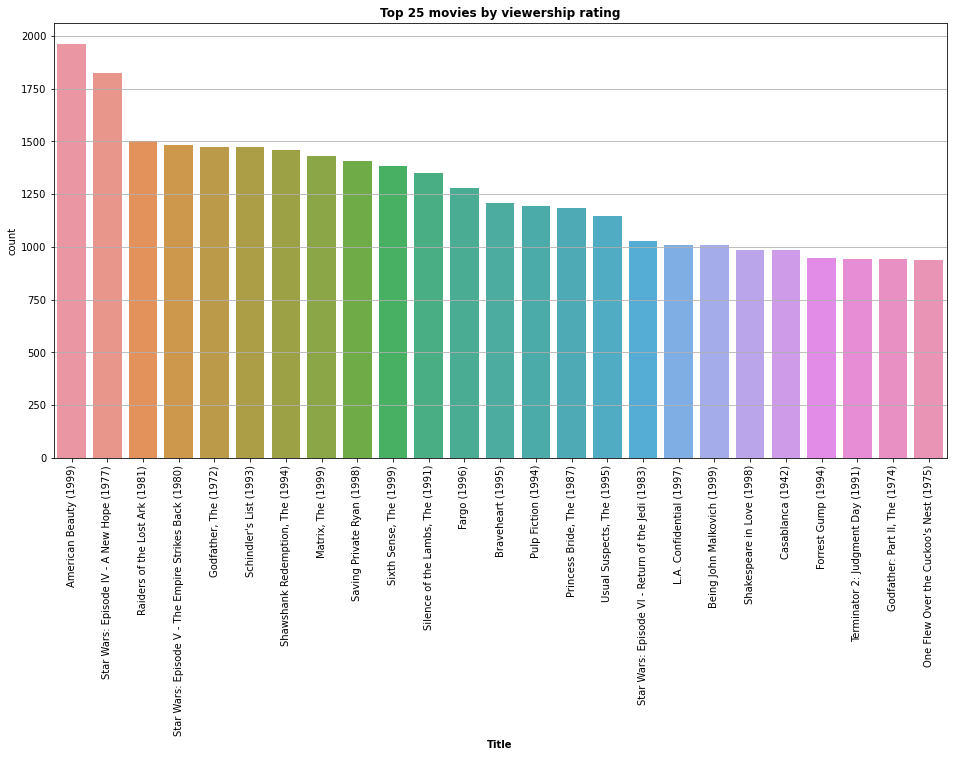

In [161]:
plt.figure(figsize=(16,8))
sns.countplot(x='Title', data=top_movies , order= top_movies['Title'].value_counts().iloc[:25].index) 
txt = {'weight':'bold'}
plt.xticks(rotation=90)
plt.title('Top 25 movies by viewership rating', fontdict=txt)
plt.xlabel('Title', fontdict=txt) 
plt.grid(axis='y')  
plt.show()

In [162]:
# Find the ratings for all the movies reviewed by for a particular user of user id = 2696
# group by UserID
df_groupPy_UserID = Master_Data.groupby(['UserID']) 
UserID = df_groupPy_UserID.get_group(2696)

In [163]:
# all the movies reviewed by user id = 2696
UserID

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Genres
24345,2696,1270,2,M,25,7,Back to the Future (1985),Comedy|Sci-Fi
29848,2696,1097,3,M,25,7,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
244232,2696,1617,4,M,25,7,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
250014,2696,800,5,M,25,7,Lone Star (1996),Drama|Mystery
273633,2696,3386,1,M,25,7,JFK (1991),Drama|Mystery
277808,2696,3176,4,M,25,7,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
371178,2696,1711,4,M,25,7,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery
377250,2696,1589,3,M,25,7,Cop Land (1997),Crime|Drama|Mystery
598042,2696,1783,4,M,25,7,Palmetto (1998),Film-Noir|Mystery|Thriller
603189,2696,1892,4,M,25,7,"Perfect Murder, A (1998)",Mystery|Thriller


## 3. Feature Engineering

In [165]:
# find all the unique genres 
Genres_list = Master_Data['Genres'].str.split('|')

unique_genres  = set()
for lie in Genres_list:
    for i in lie: 
        unique_genres.add(i)
        
print(unique_genres)

{'Musical', 'Drama', 'War', 'Comedy', 'Mystery', 'Thriller', 'Sci-Fi', 'Action', "Children's", 'Romance', 'Fantasy', 'Crime', 'Western', 'Film-Noir', 'Documentary', 'Animation', 'Horror', 'Adventure'}


In [166]:
# Create a separate column for each genre category with a one-hot encoding
Master_Data = Master_Data.join(Master_Data.pop('Genres').str.get_dummies('|'))

In [167]:
Master_Data.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
# There is 18 diffrent Genres plus 7 columns of the dataset 
# the expected number of columns is 25
Master_Data.shape

(1000209, 25)

In [169]:
# drop 'UserID', 'MovieID', 'Title', coulmns since it is not affecting the ratings of any particular movie
Master_Data.drop(['UserID', 'MovieID', 'Title'],axis=1,inplace= True)
Master_Data.columns

Index(['Rating', 'Gender', 'Age', 'Occupation', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [170]:
# perform one-hot encoding on the Gender columns
Master_Data = pd.get_dummies(Master_Data, columns =['Gender'])
Master_Data

,Rating,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender_F,Gender_M
0,5,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,56,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,25,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,25,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5,18,17,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1000205,3,35,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000206,1,18,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000207,5,18,20,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [187]:
Master_Data.columns

Index(['Rating', 'Age', 'Occupation', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'Gender_F', 'Gender_M'],
      dtype='object')

## 4. Linear Regression

In [171]:
# train_test_split
X= Master_Data.drop(['Rating'],axis=1)
Y= Master_Data['Rating']

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=123)

In [188]:
X.columns

Index(['Age', 'Occupation', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'Gender_F', 'Gender_M'],
      dtype='object')

In [172]:
#LinearRegression
model = LinearRegression().fit(x_train,y_train)

In [173]:
predict = model.predict(x_test)
predict

array([3.48937763, 3.42982615, 3.46224985, ..., 3.49213918, 3.71291328,
       3.70270772])

In [186]:
#metrics
print( 'Mean Sq Error  MSE: %.2f' % metrics.mean_squared_error(y_test, predict))
print('r2 value: %.2f' % metrics.r2_score(y_test, predict))

Mean Sq Error  MSE: 1.20
r2 value: 0.04


In [182]:
prediction = pd.DataFrame({'Test': y_test, 'Prediction': predict})
prediction.head(10)

,Test,Prediction
382276,4,3.489378
712314,4,3.429826
415052,3,3.462250
465169,4,3.331652
270413,3,3.372526
841907,3,3.426117
148371,5,3.501769
896477,3,3.516894
985952,4,3.535527
472528,4,3.638244
